In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d mariaqib/hdpe-and-pet-bottle-plastic-waste

 99% 248M/250M [00:09<00:00, 30.7MB/s]
100% 250M/250M [00:09<00:00, 28.6MB/s]


In [ ]:
!unzip /content/hdpe-and-pet-bottle-plastic-waste.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/train/bottle (1903).jpg  
  inflating: images/train/bottle (1903).xml  
  inflating: images/train/bottle (1904).jpg  
  inflating: images/train/bottle (1904).xml  
  inflating: images/train/bottle (1905).jpg  
  inflating: images/train/bottle (1905).xml  
  inflating: images/train/bottle (1907).jpg  
  inflating: images/train/bottle (1907).xml  
  inflating: images/train/bottle (1909).jpg  
  inflating: images/train/bottle (1909).xml  
  inflating: images/train/bottle (1910).jpg  
  inflating: images/train/bottle (1910).xml  
  inflating: images/train/bottle (1911).jpg  
  inflating: images/train/bottle (1911).xml  
  inflating: images/train/bottle (1914).jpg  
  inflating: images/train/bottle (1914).xml  
  inflating: images/train/bottle (1916).jpg  
  inflating: images/train/bottle (1916).xml  
  inflating: images/train/bottle (1918).jpg  
  inflating: images/train/bottle (1918).xml  
  inflating: images/train/bot

i have a dataset in which I already have folder for train test and valid containing 5858, 734, 732 files in each file, i have image as jpg and then for that image I have annotation as .xml, then I have next image and then next as its annotation , so like that I have all files for train, test , val.

All the annotation files are in Pascal Voc format i.e .xml file which is needed for SSD
and .txt files are needed for YOLO.

# To check current working directory

In [ ]:
import os
Home=os.getcwd()
print(Home)

/content


# To make it in .txt format

In [ ]:
import shutil
import os

def organize_dataset(train_folder, test_folder, valid_folder, destination_folder):
    os.makedirs(os.path.join(destination_folder, 'train', 'images'), exist_ok=True)
    os.makedirs(os.path.join(destination_folder, 'train', 'labels'), exist_ok=True)
    os.makedirs(os.path.join(destination_folder, 'test', 'images'), exist_ok=True)
    os.makedirs(os.path.join(destination_folder, 'test', 'labels'), exist_ok=True)
    os.makedirs(os.path.join(destination_folder, 'valid', 'images'), exist_ok=True)
    os.makedirs(os.path.join(destination_folder, 'valid', 'labels'), exist_ok=True)

    # Organizing train dataset
    organize_split(train_folder, os.path.join(destination_folder, 'train'))

    # Organizing test dataset
    organize_split(test_folder, os.path.join(destination_folder, 'test'))

    # Organizing valid dataset
    organize_split(valid_folder, os.path.join(destination_folder, 'valid'))

def organize_split(split_folder, destination_folder):
    # Iterating through each file in the split folder
    for filename in os.listdir(split_folder):
        if filename.endswith('.jpg'):
            image_path = os.path.join(split_folder, filename)
            xml_filename = filename.replace('.jpg', '.xml')
            xml_path = os.path.join(split_folder, xml_filename)

            # Moving image to images folder
            shutil.move(image_path, os.path.join(destination_folder, 'images', filename))

            # Moving xml file to labels folder
            shutil.move(xml_path, os.path.join(destination_folder, 'labels', xml_filename))

if __name__ == "__main__":
    train_folder = '/content/images/train'
    test_folder = '/content/images/test'
    valid_folder = '/content/images/val'
    destination_folder = '/content/destination_folder'
    organize_dataset(train_folder, test_folder, valid_folder, destination_folder)


Why we need parsing?

In [ ]:
import os
from xml.etree import ElementTree as ET

def convert_xml_to_txt_inplace(folder):
    # Dictionary to store class names and their corresponding IDs
    class_map = {}
    class_id = 0

    # Iterating through each XML file in the folder
    for xml_file in os.listdir(folder):
        if xml_file.endswith('.xml'):
            # Read the XML file
            xml_path = os.path.join(folder, xml_file)
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Creating a corresponding TXT file
            txt_file = os.path.join(folder, xml_file.replace('.xml', '.txt'))
            with open(txt_file, 'w') as f:
                # Iterating through each object in the XML
                for obj in root.findall('object'):
                    # Get the object's class and bounding box coordinates
                    class_name = obj.find('name').text
                    if class_name not in class_map:
                        class_map[class_name] = class_id
                        class_id += 1
                    bbox = obj.find('bndbox')
                    xmin = float(bbox.find('xmin').text)
                    ymin = float(bbox.find('ymin').text)
                    xmax = float(bbox.find('xmax').text)
                    ymax = float(bbox.find('ymax').text)

                    # Get image width and height
                    width = float(root.find('size').find('width').text)
                    height = float(root.find('size').find('height').text)

                    # Convert bounding box coordinates to YOLO format
                    x_center = (xmin + xmax) / (2 * width)
                    y_center = (ymin + ymax) / (2 * height)
                    bbox_width = (xmax - xmin) / width
                    bbox_height = (ymax - ymin) / height

                    # Write the object's details to the TXT file in YOLO format
                    f.write(f"{class_map[class_name]} {x_center} {y_center} {bbox_width} {bbox_height}\n")

            # Remove the XML file if it exists
            if os.path.exists(xml_path):
                os.remove(xml_path)

if __name__ == "__main__":
    # Specify the paths to the train, test, and valid folders
    train_folder = '/content/destination_folder/train/labels'
    test_folder = '/content/destination_folder/test/labels'
    valid_folder = '/content/destination_folder/valid/labels'

    # Convert XML to TXT in each folder
    convert_xml_to_txt_inplace(train_folder)
    convert_xml_to_txt_inplace(test_folder)
    convert_xml_to_txt_inplace(valid_folder)


In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9

Cloning into 'yolov9'...
remote: Enumerating objects: 621, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 621 (delta 172), reused 138 (delta 109), pack-reused 380
Receiving objects: 100% (621/621), 3.22 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/yolov9


In [ ]:
pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov9c.yaml')

model = YOLO('yolov9c.pt')

model.info()



100%|██████████| 49.4M/49.4M [00:00<00:00, 278MB/s]


YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [ ]:
num_classes=3
classes=['HDPE','PET','caps']

workingDir = "/content"
dataDir = '/content/destination_folder'

In [ ]:
import yaml
file_dict = {
    'train': '/content/destination_folder/test',
    'val': '/content/destination_folder/test',
    'test':'/content/destination_folder/test',
    'nc': num_classes,
    'names': classes
}

with open(os.path.join(workingDir,'yolov9', 'data.yaml'), 'w+') as f:
  yaml.dump(file_dict, f)

In [ ]:
results = model.train(data='data.yaml', epochs=15, imgsz=640)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

train: Scanning /content/destination_folder/test/labels.cache... 367 images, 0 backgrounds, 0 corrupt: 100%|██████████| 367/367 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/destination_folder/test/labels.cache... 367 images, 0 backgrounds, 0 corrupt: 100%|██████████| 367/367 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      11.1G     0.7865     0.5274      1.087         19        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        367        522      0.933       0.94      0.976      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      11.1G     0.7988     0.5754      1.082         23        640: 100%|██████████| 23/23 [00:17<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]

                   all        367        522      0.852      0.918      0.952      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      11.1G     0.8484     0.6354      1.136         22        640: 100%|██████████| 23/23 [00:17<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]

                   all        367        522      0.843      0.885       0.91      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      11.1G     0.8736     0.7208      1.153         22        640: 100%|██████████| 23/23 [00:16<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]

                   all        367        522      0.787      0.839      0.923      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      11.1G     0.8705     0.6563      1.149         22        640: 100%|██████████| 23/23 [00:16<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]

                   all        367        522      0.914      0.897      0.949      0.726


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      11.1G     0.8697     0.6514      1.162         20        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]

                   all        367        522       0.89      0.895      0.943      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      11.1G     0.8684     0.6207      1.134         19        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        367        522      0.823      0.861      0.911      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      11.1G     0.8451      0.605      1.127         23        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        367        522      0.682      0.759       0.83      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      11.1G     0.7947     0.5818      1.094         25        640: 100%|██████████| 23/23 [00:17<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]

                   all        367        522       0.91       0.95      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      11.1G     0.8473     0.5603      1.121         19        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.74it/s]

                   all        367        522      0.959       0.92      0.966      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      11.1G     0.7864     0.5241      1.078         24        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        367        522      0.907      0.981      0.975      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      11.1G     0.7646     0.4867      1.068         22        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]

                   all        367        522      0.948      0.943      0.975      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      11.1G     0.7437     0.5043      1.075         23        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]

                   all        367        522       0.94      0.948      0.972       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      11.1G     0.7123     0.4591      1.038         23        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        367        522      0.964      0.964      0.986      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      11.1G     0.6973     0.4511      1.012         20        640: 100%|██████████| 23/23 [00:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        367        522      0.969      0.974      0.987      0.818



15 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]


                   all        367        522      0.969      0.974      0.987      0.817
                  HDPE        367        232      0.998      0.996      0.995      0.899
                   PET        367        135      0.991          1      0.995      0.912
                  caps        367        155      0.917      0.927       0.97      0.641
Speed: 0.2ms preprocess, 8.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2


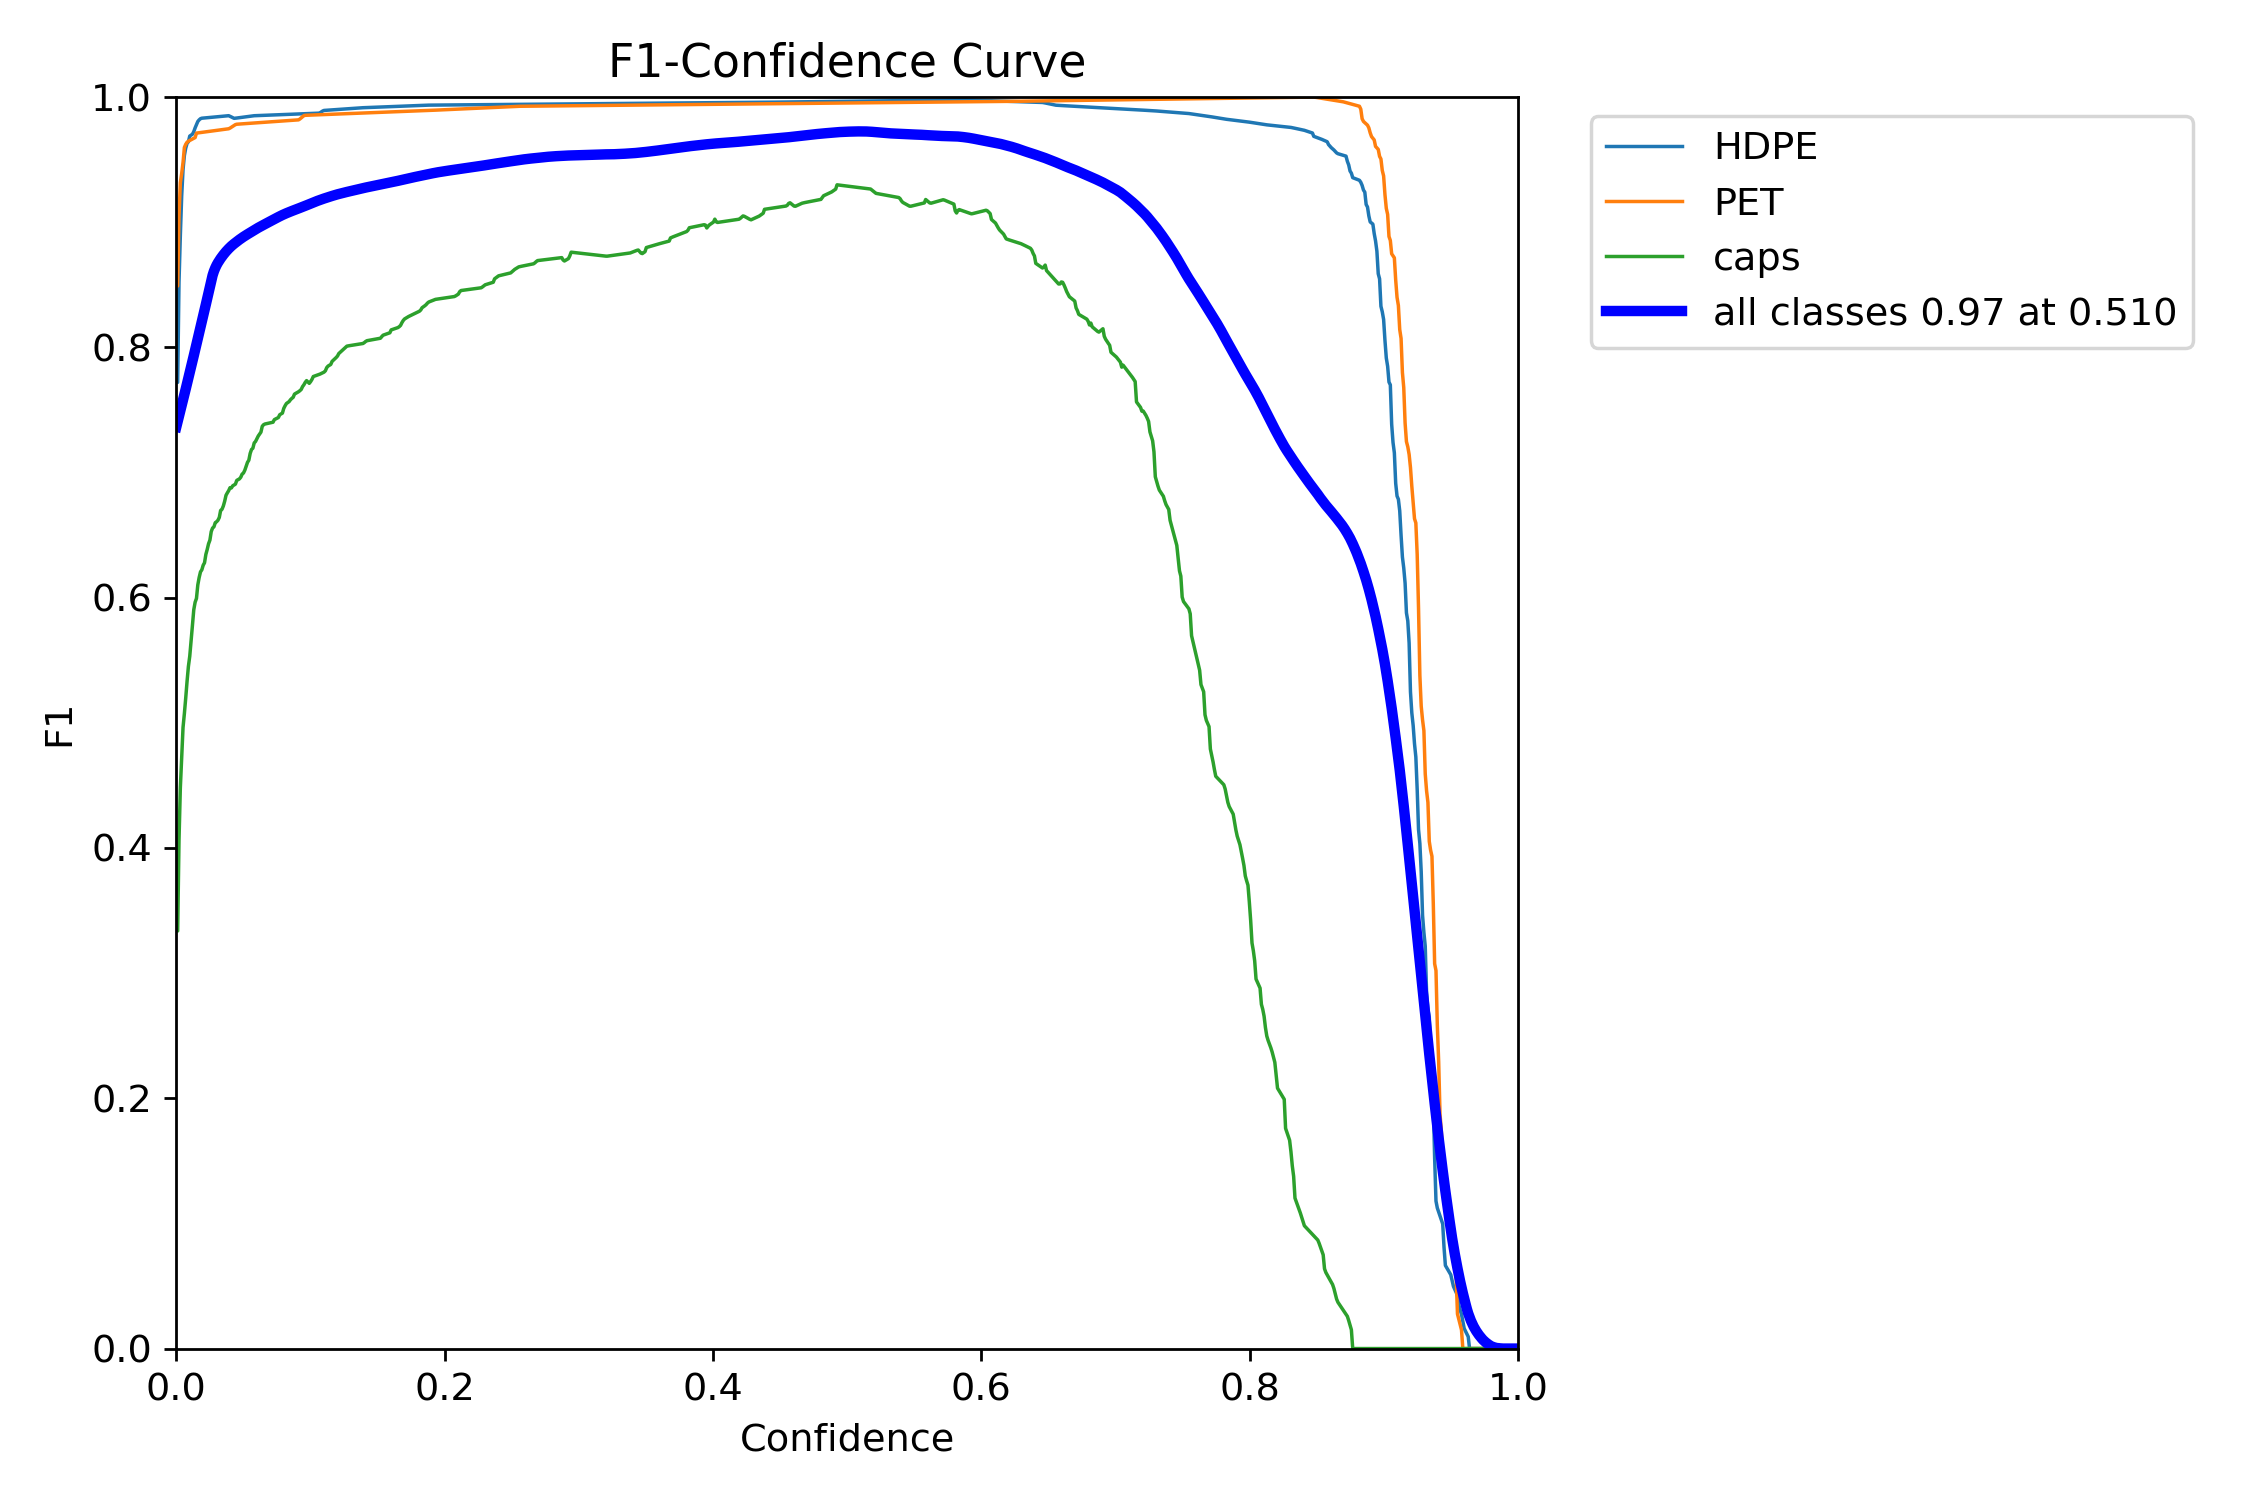

In [ ]:
Image(filename='/content/yolov9/runs/detect/train2/F1_curve.png')

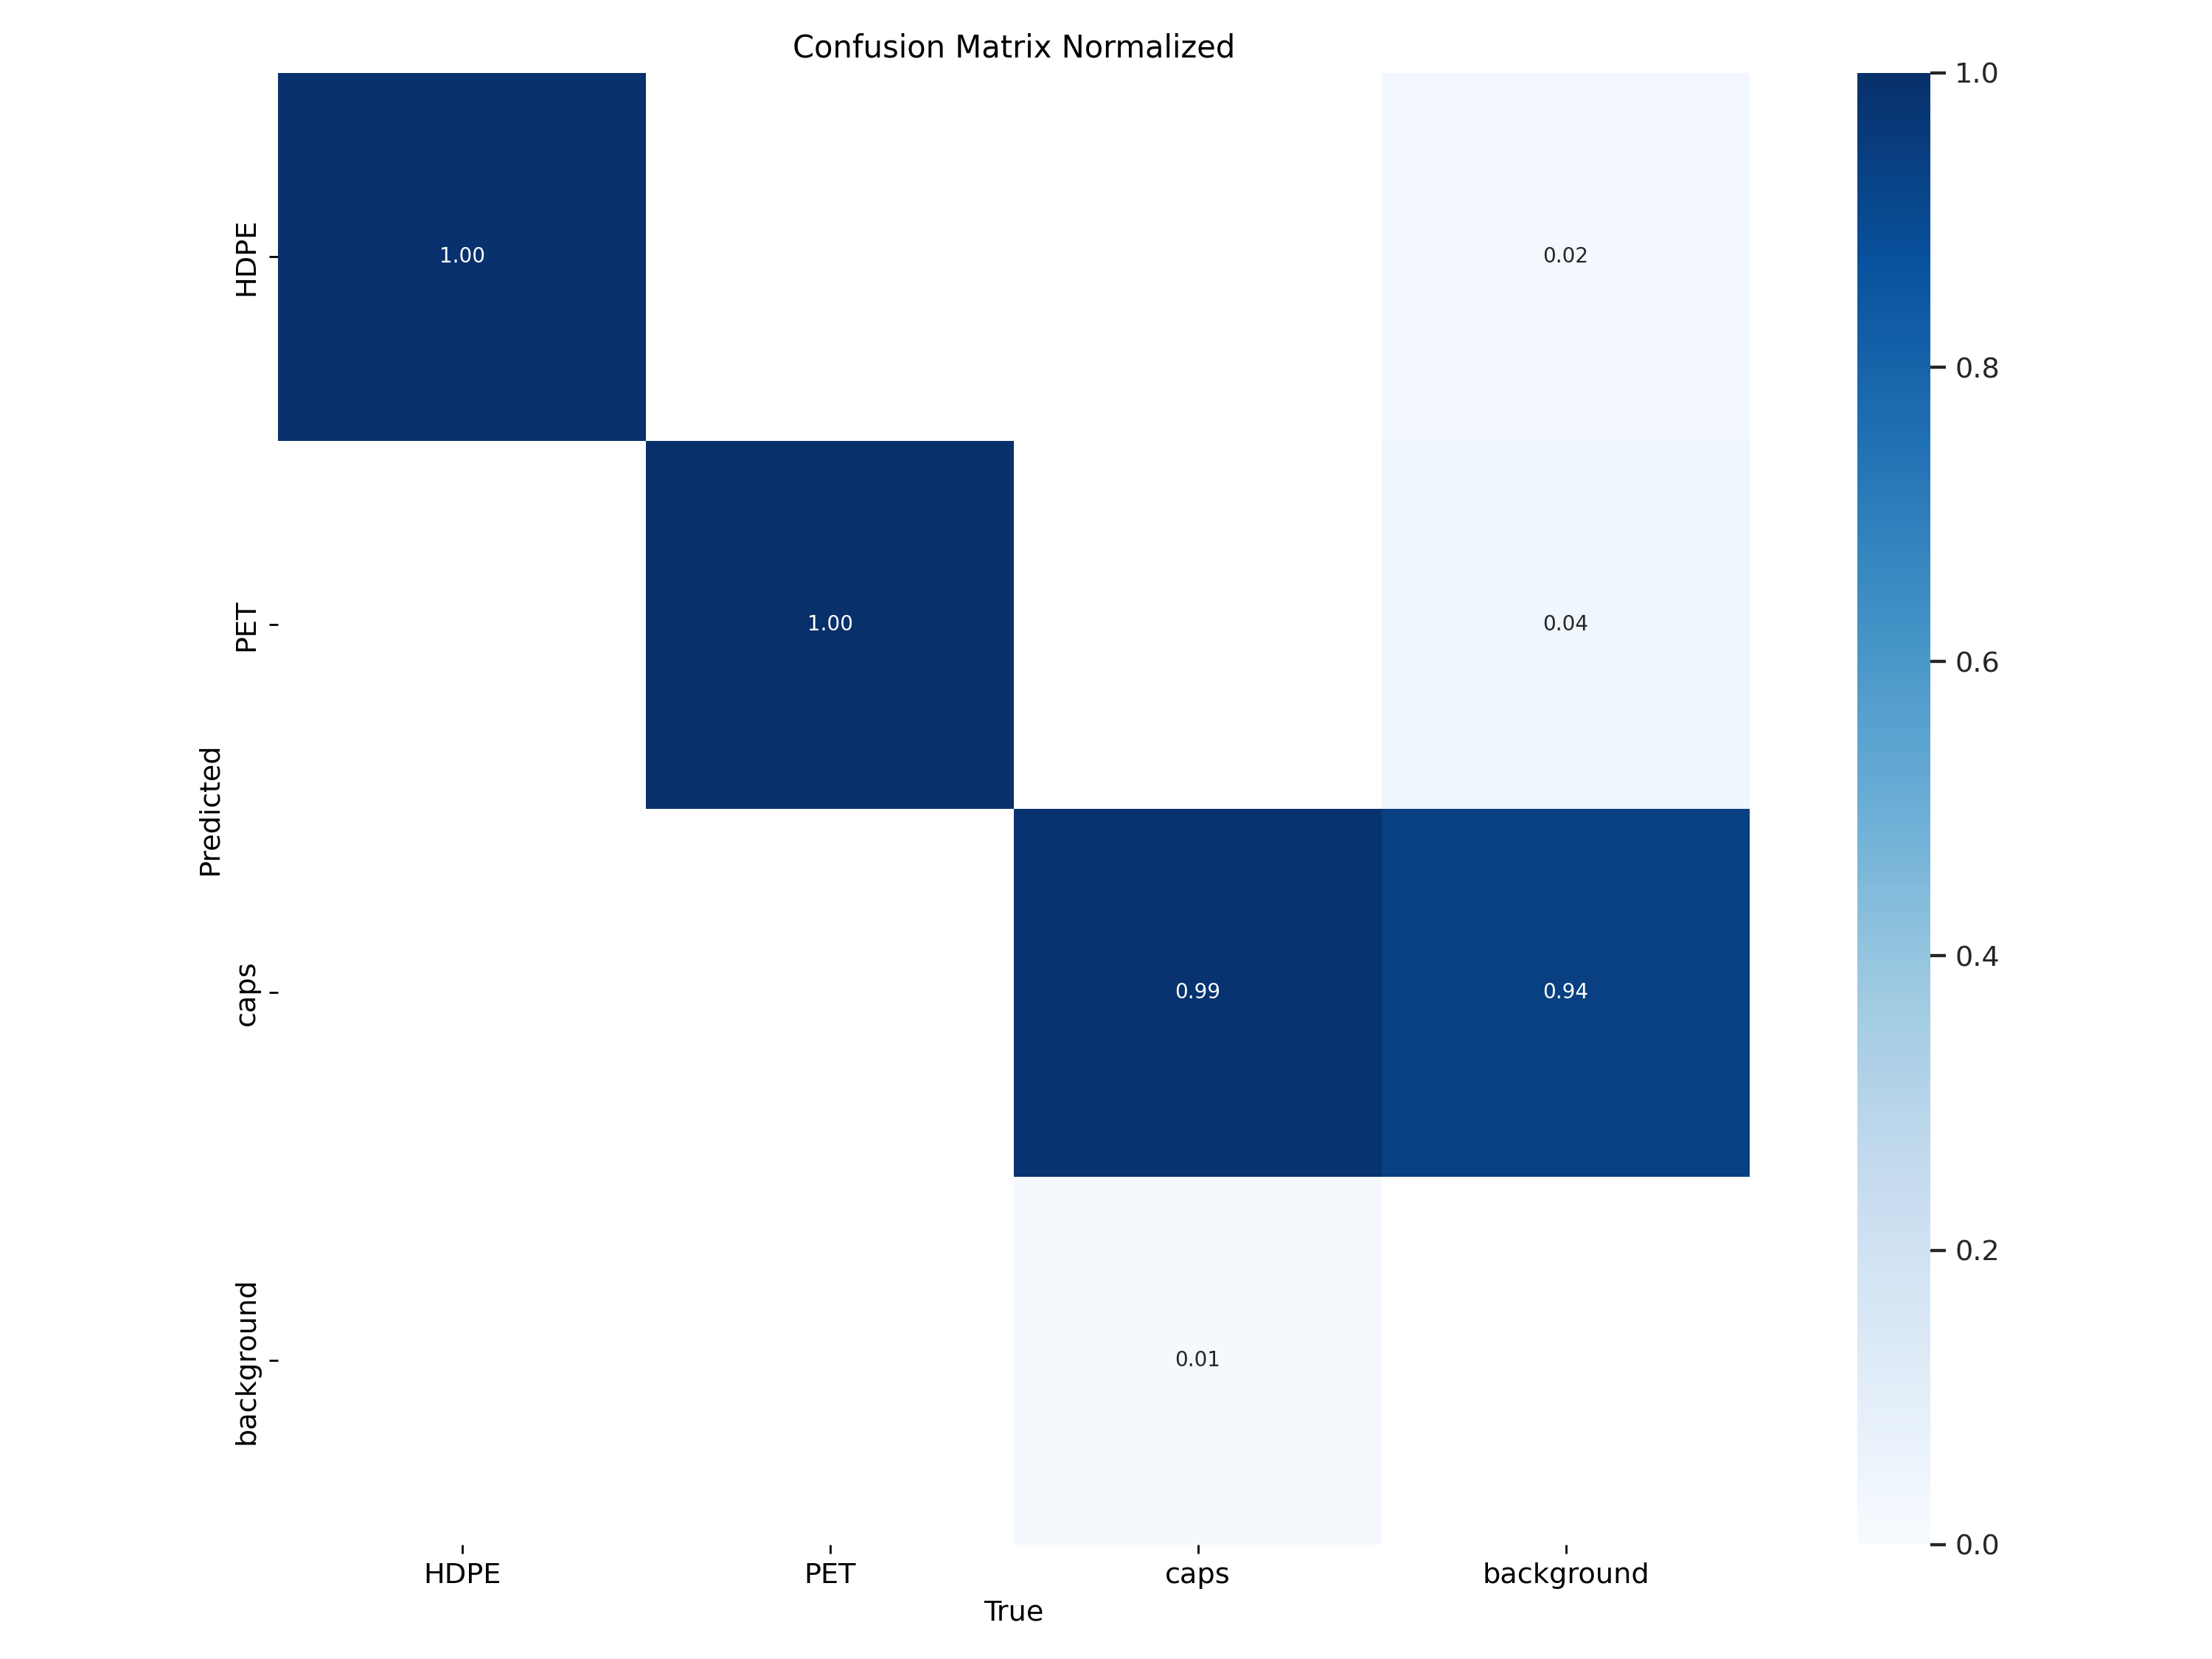

In [ ]:
Image(filename='/content/yolov9/runs/detect/train2/confusion_matrix_normalized.png')

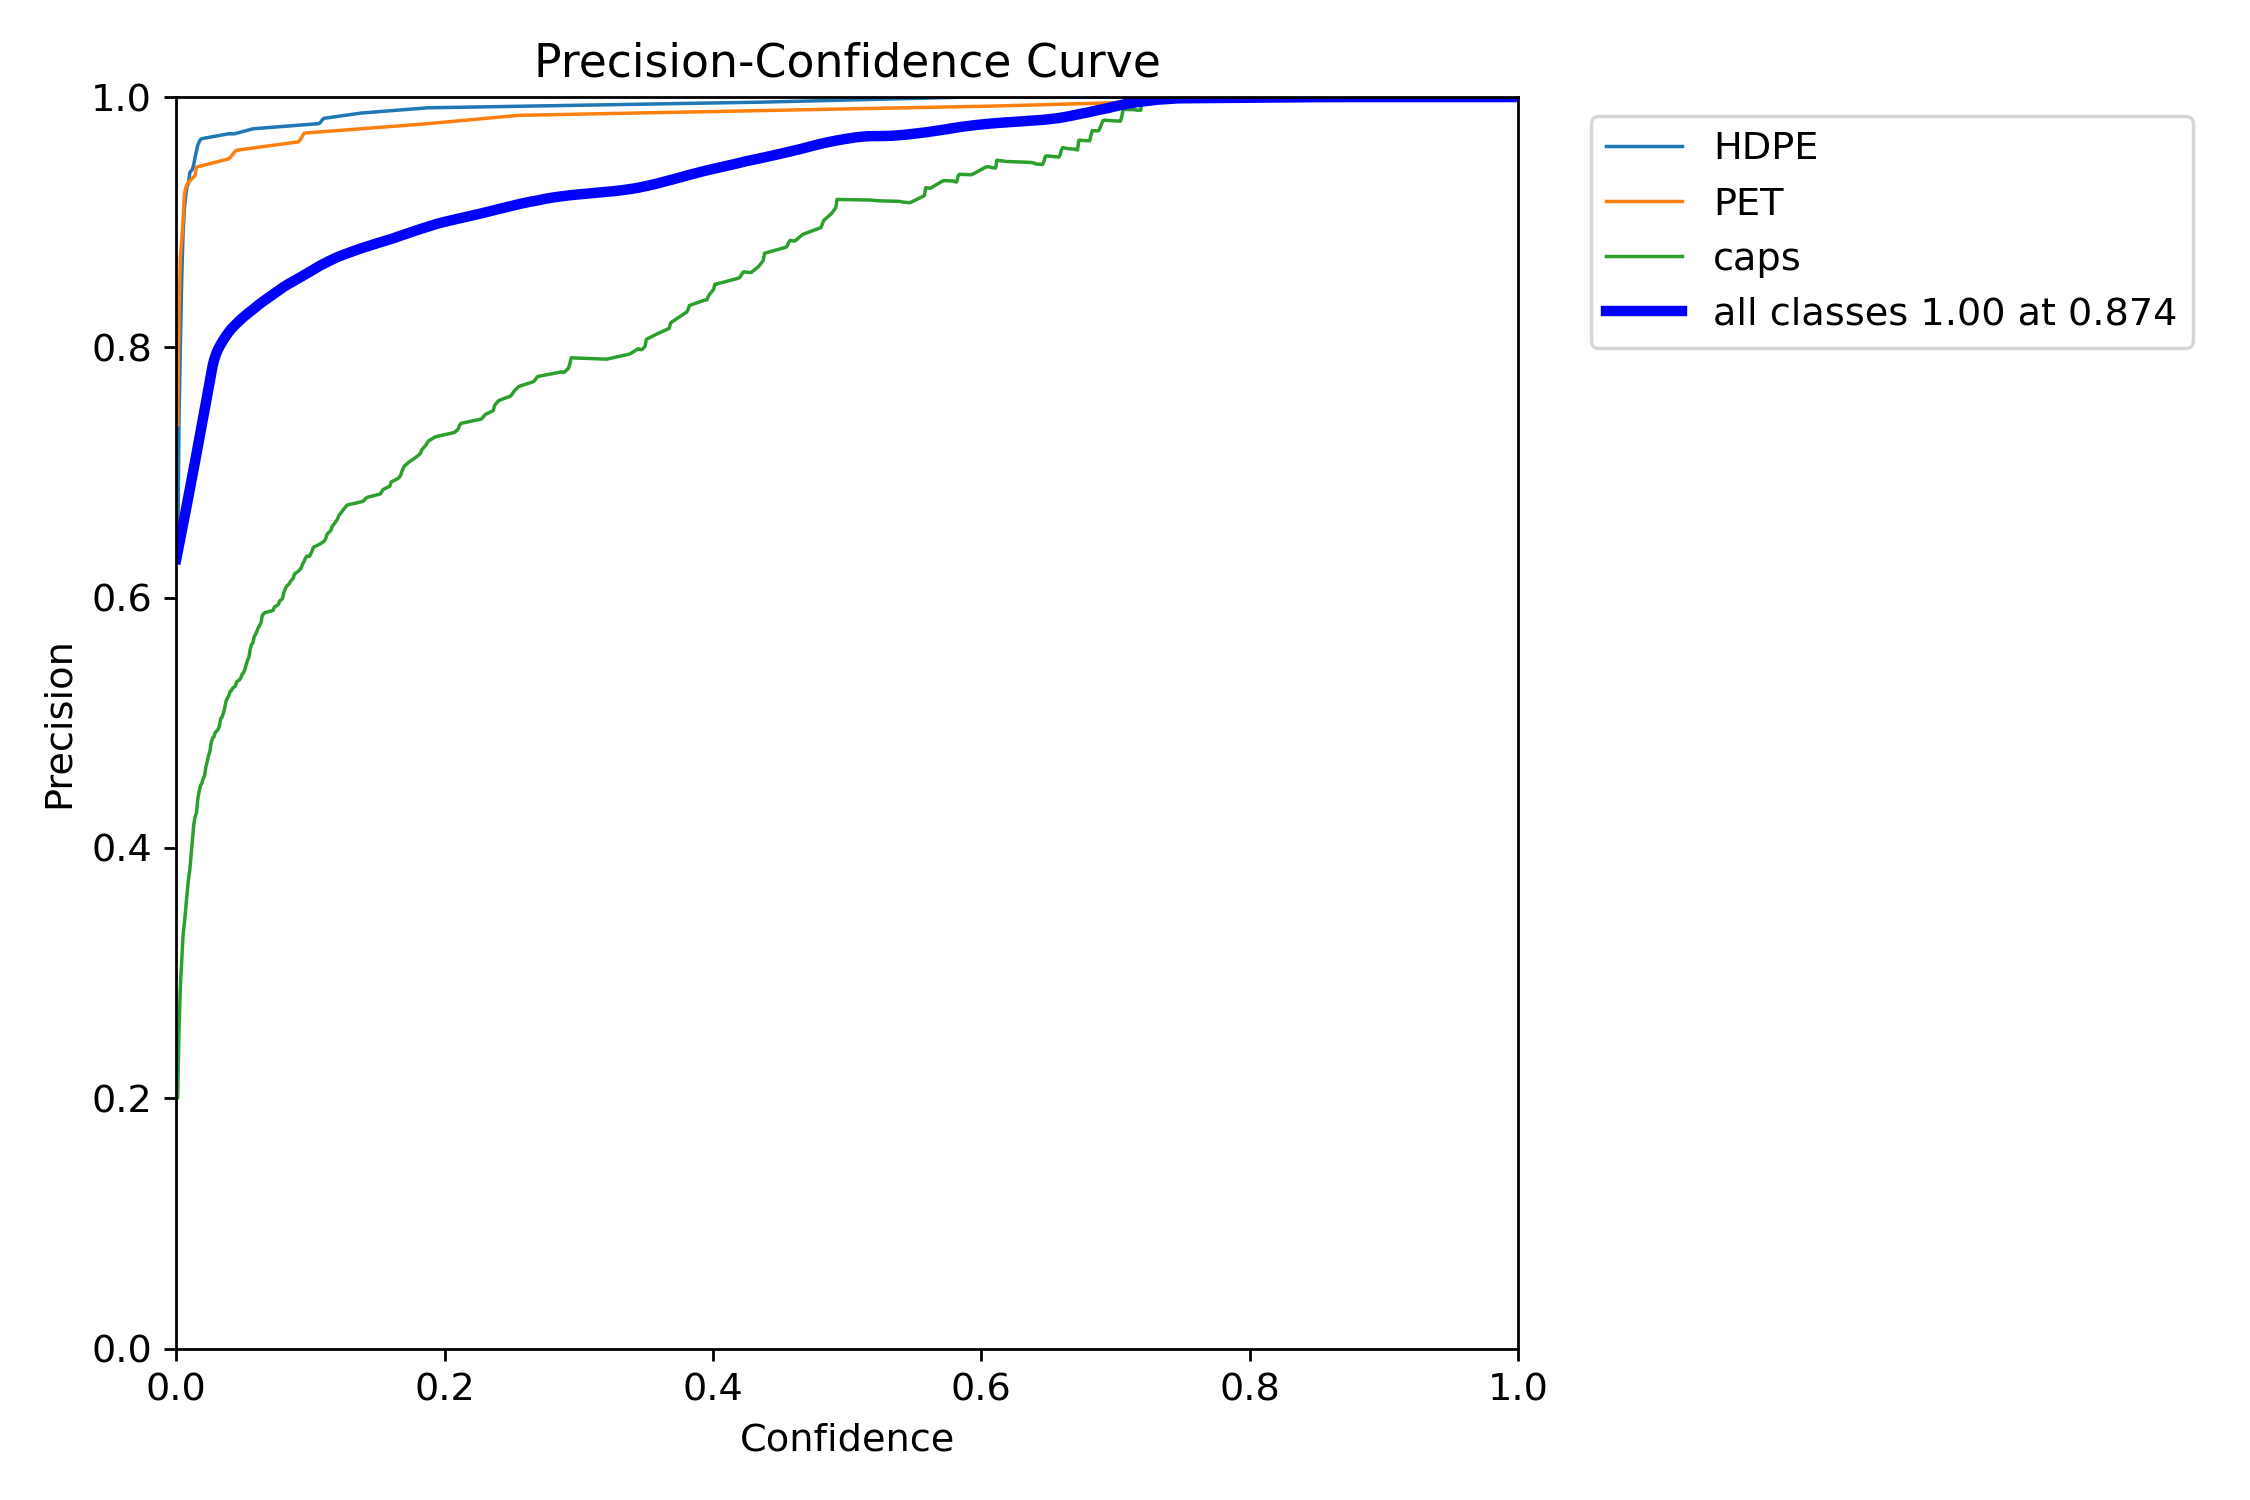

In [ ]:
Image(filename='/content/yolov9/runs/detect/train2/P_curve.png')

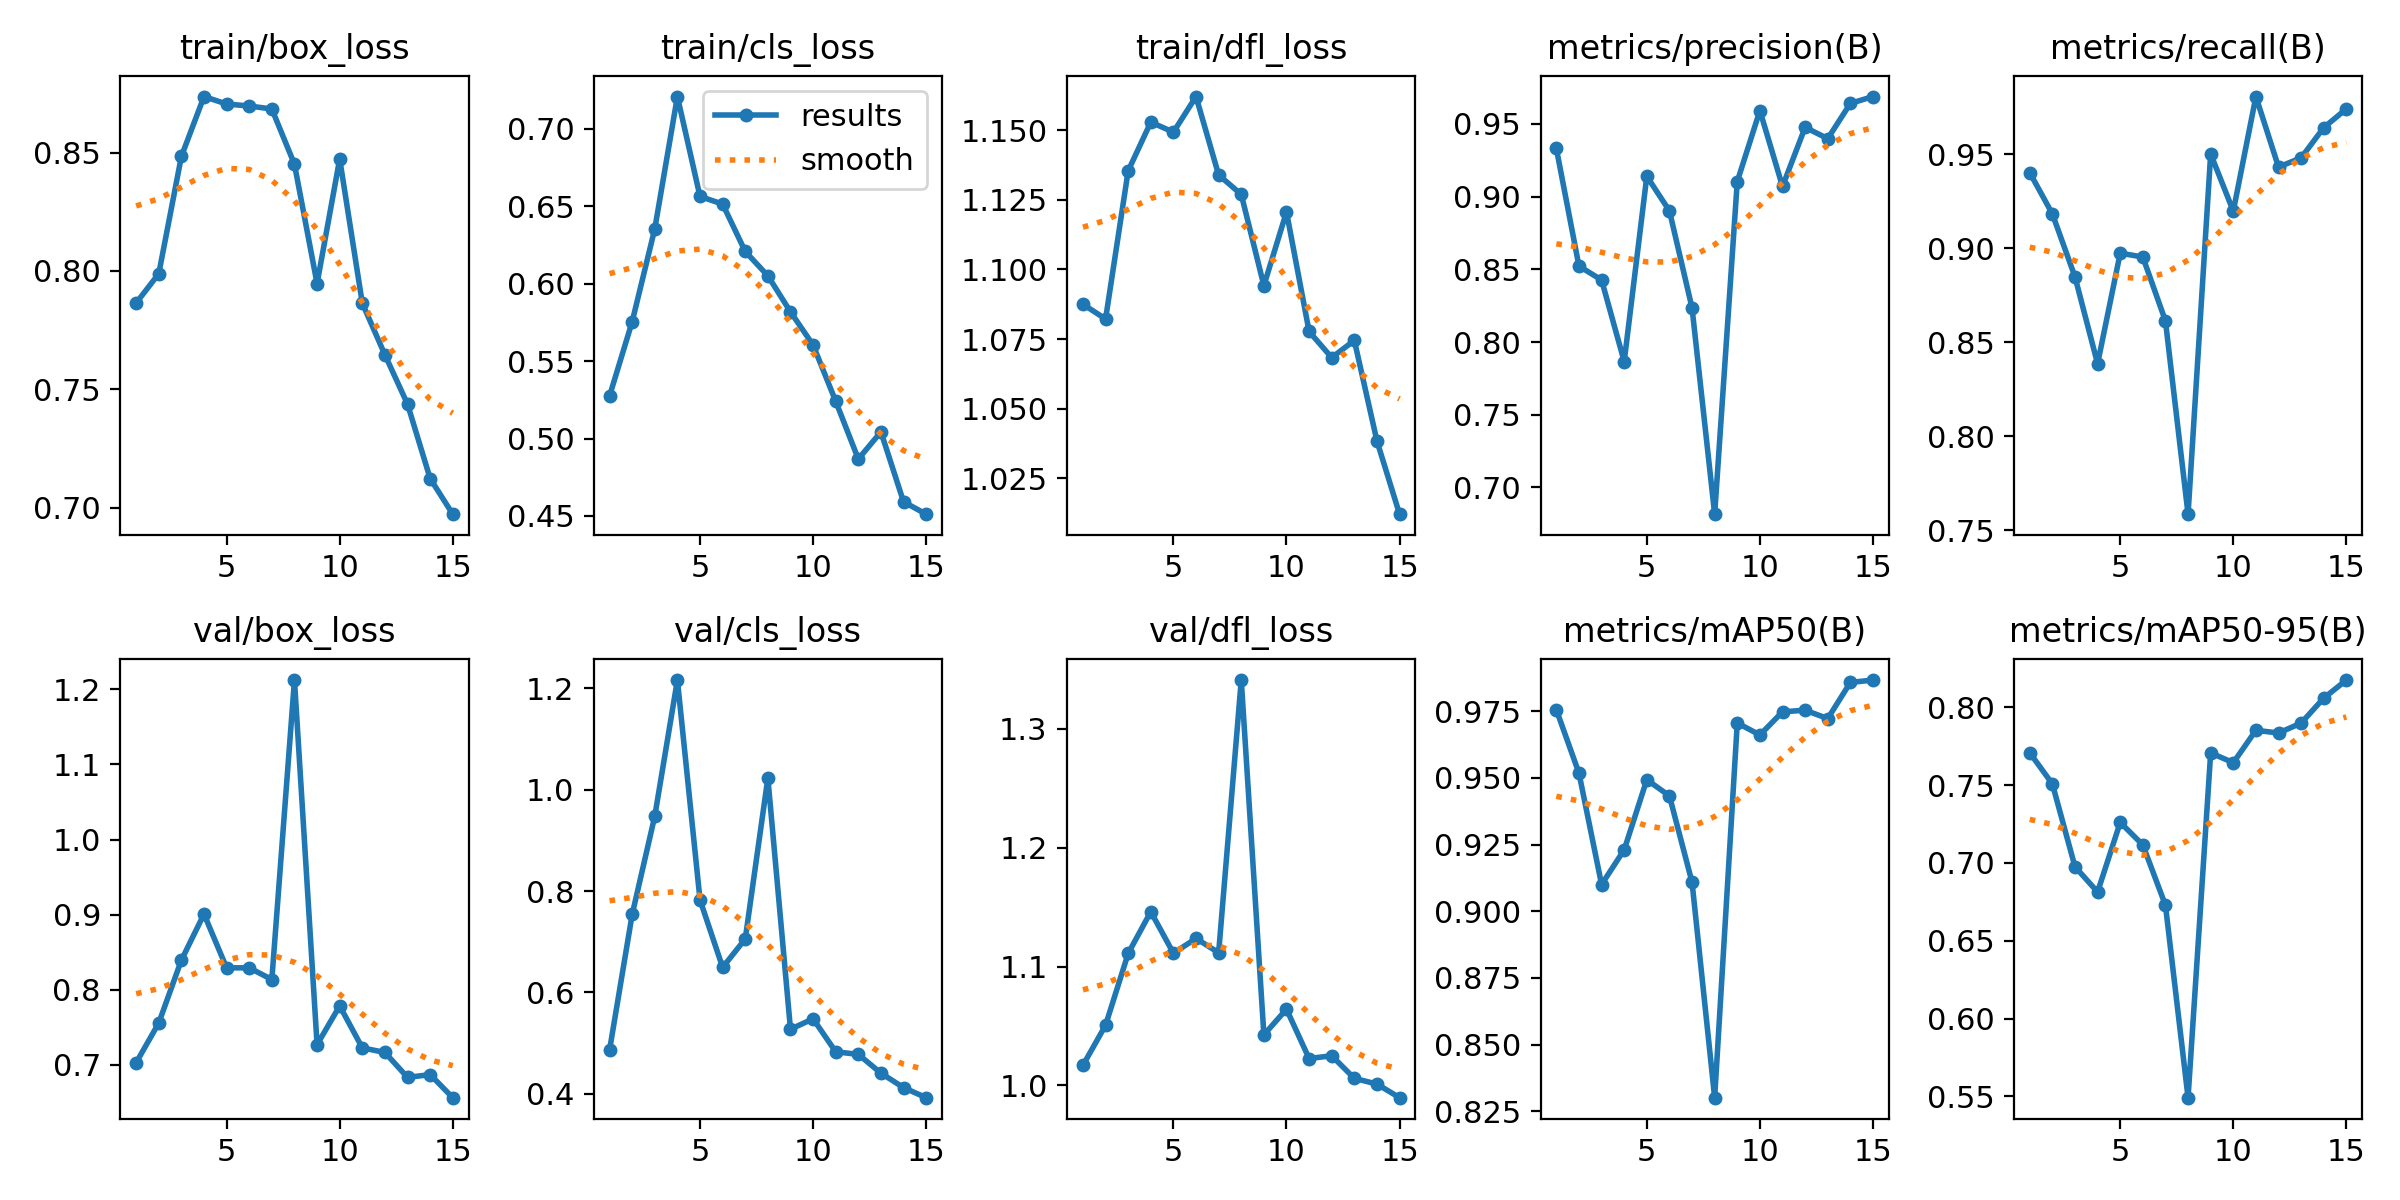

In [ ]:
Image(filename='/content/yolov9/runs/detect/train2/results.png')

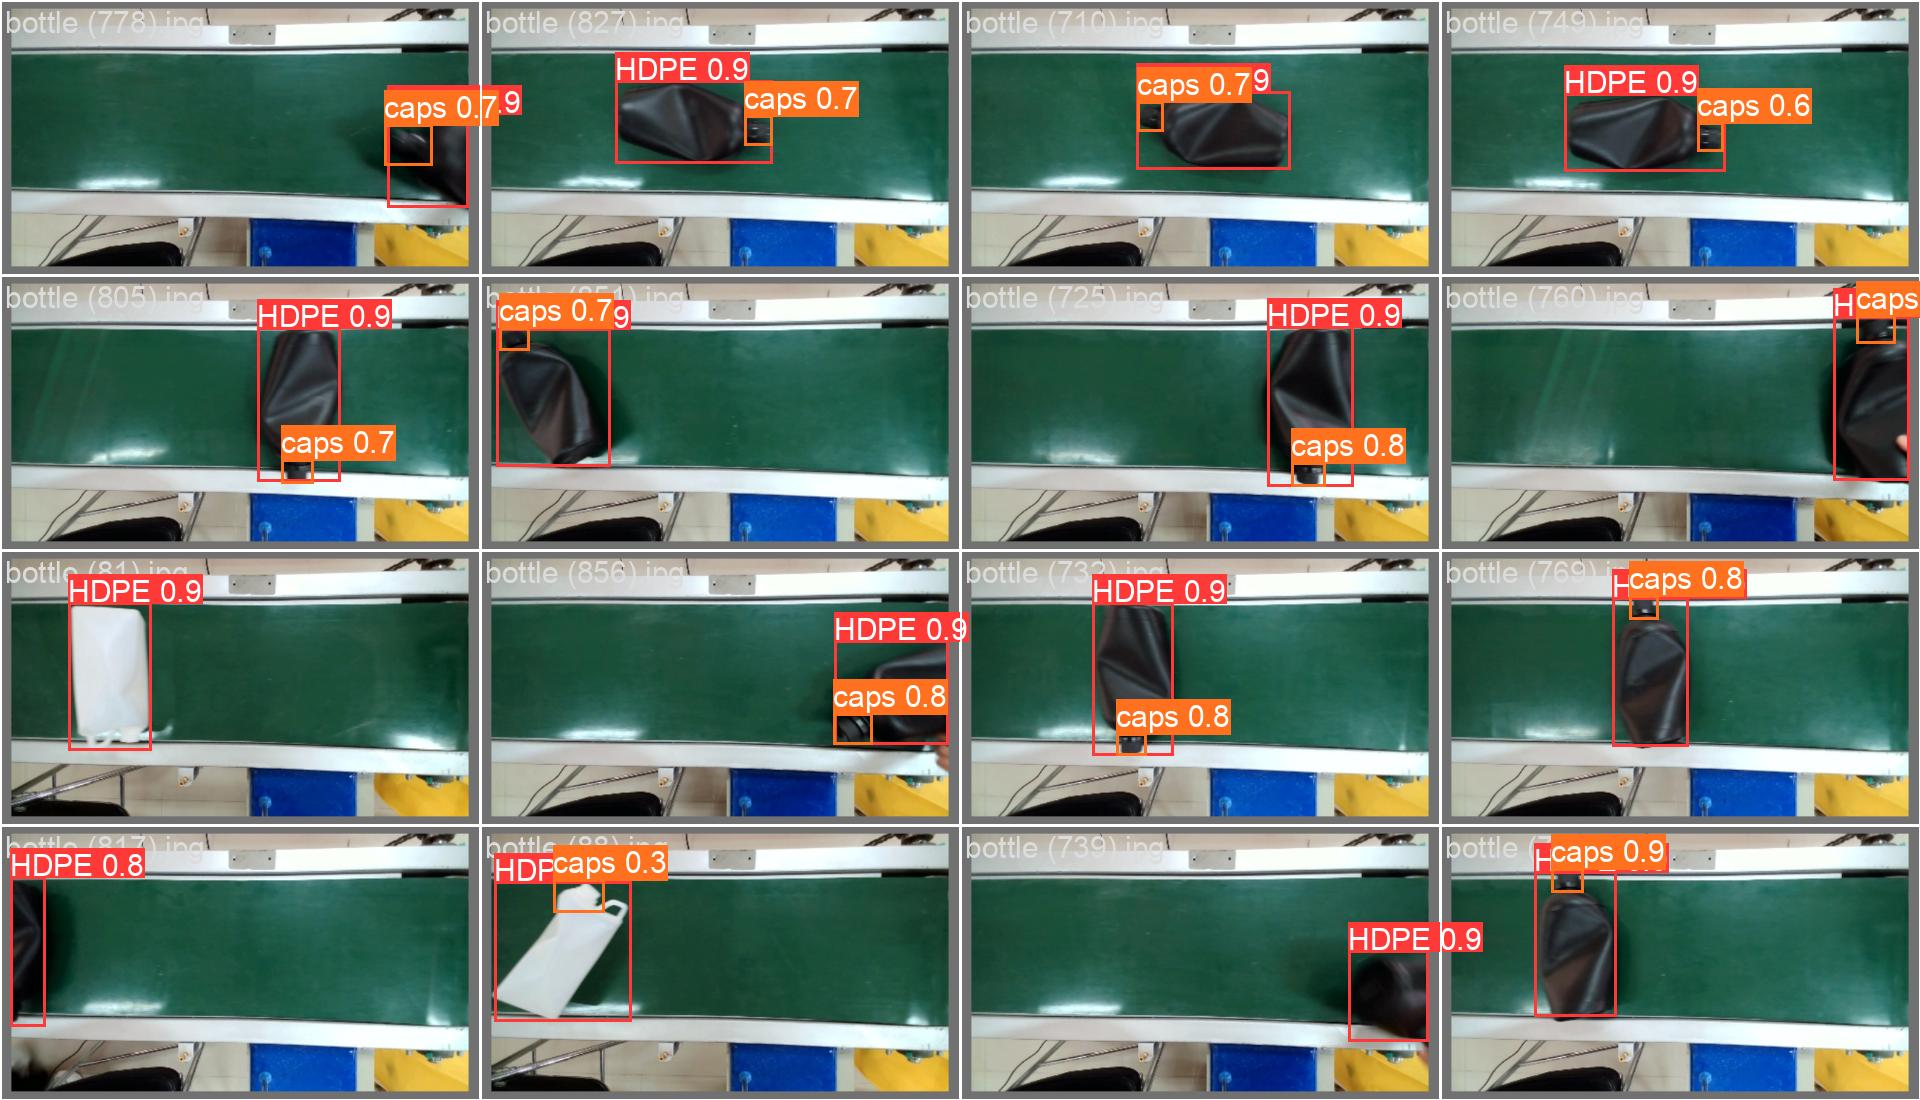

In [ ]:
Image('/content/yolov9/runs/detect/train2/val_batch0_pred.jpg')

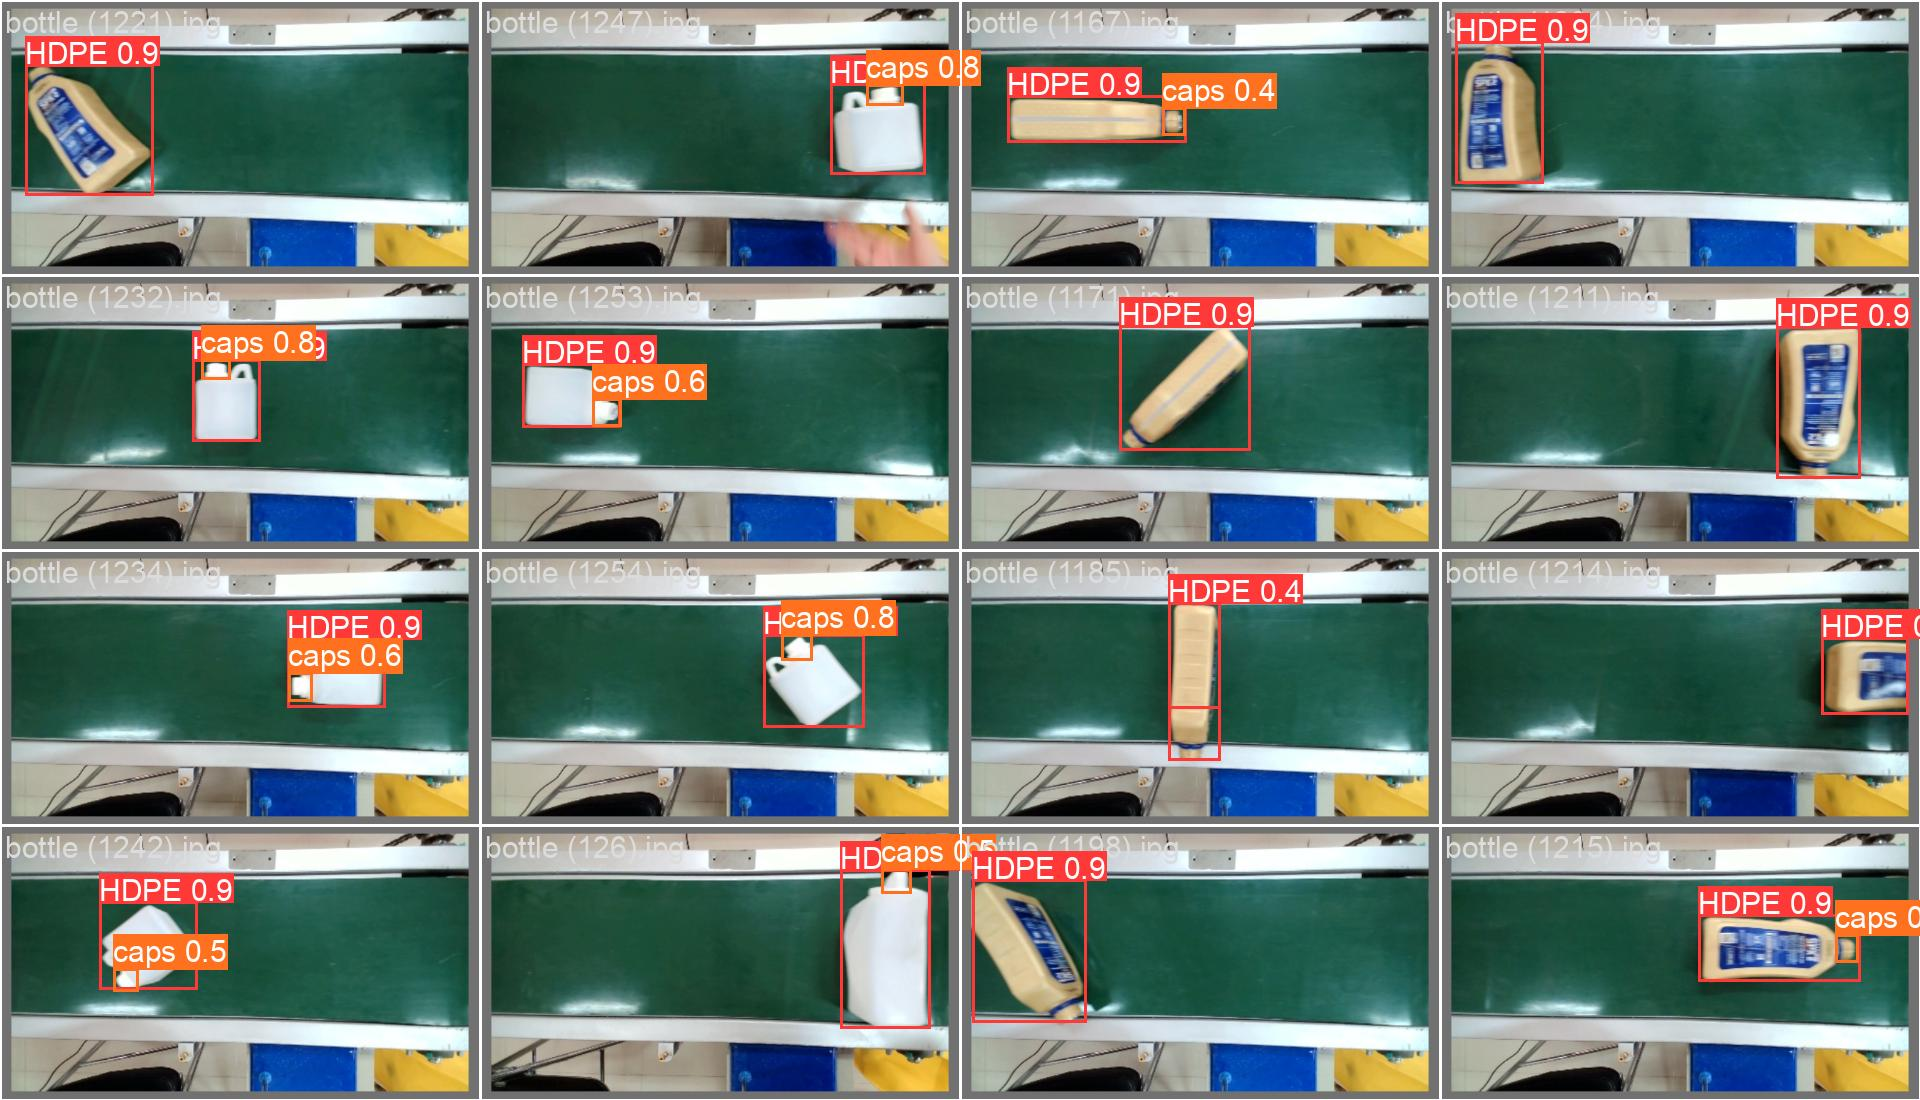

In [ ]:
Image('/content/yolov9/runs/detect/train2/val_batch1_pred.jpg')

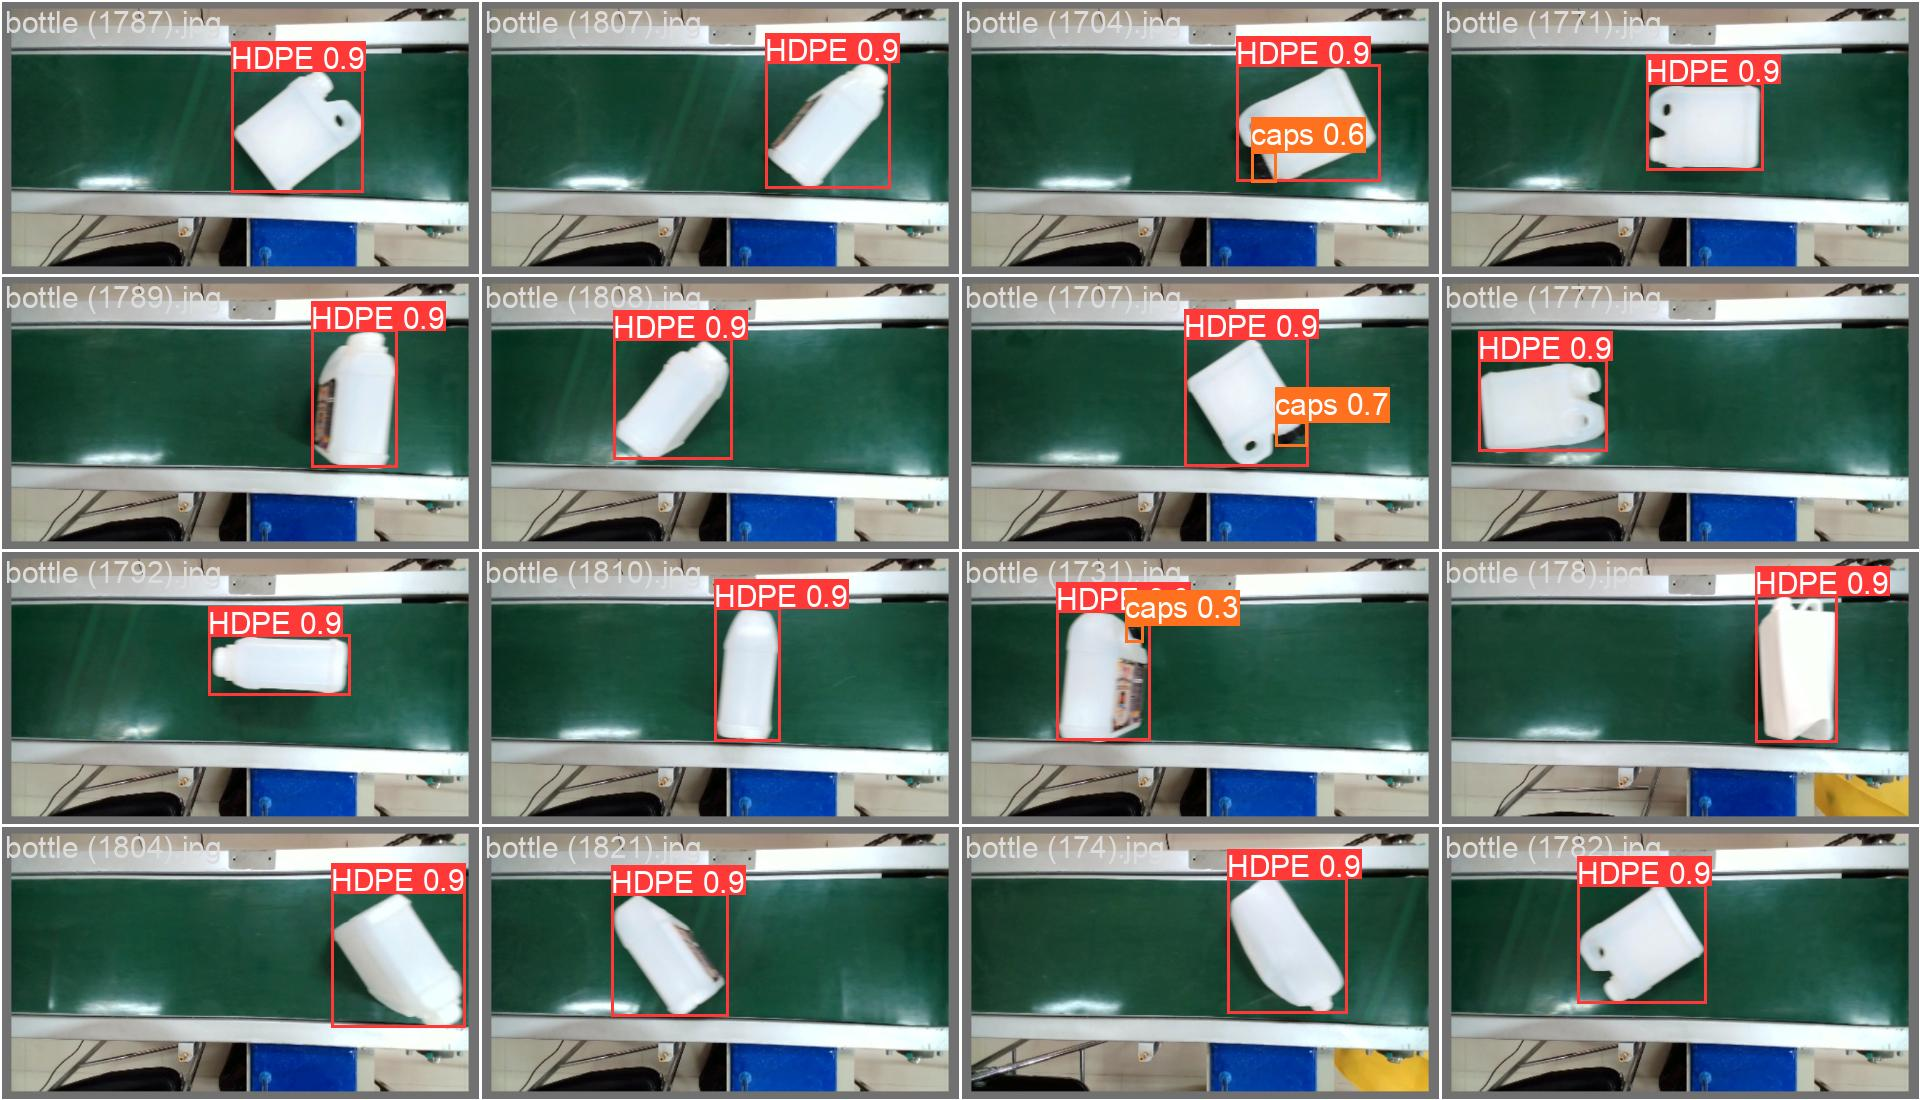

In [ ]:
Image('/content/yolov9/runs/detect/train2/val_batch2_pred.jpg')

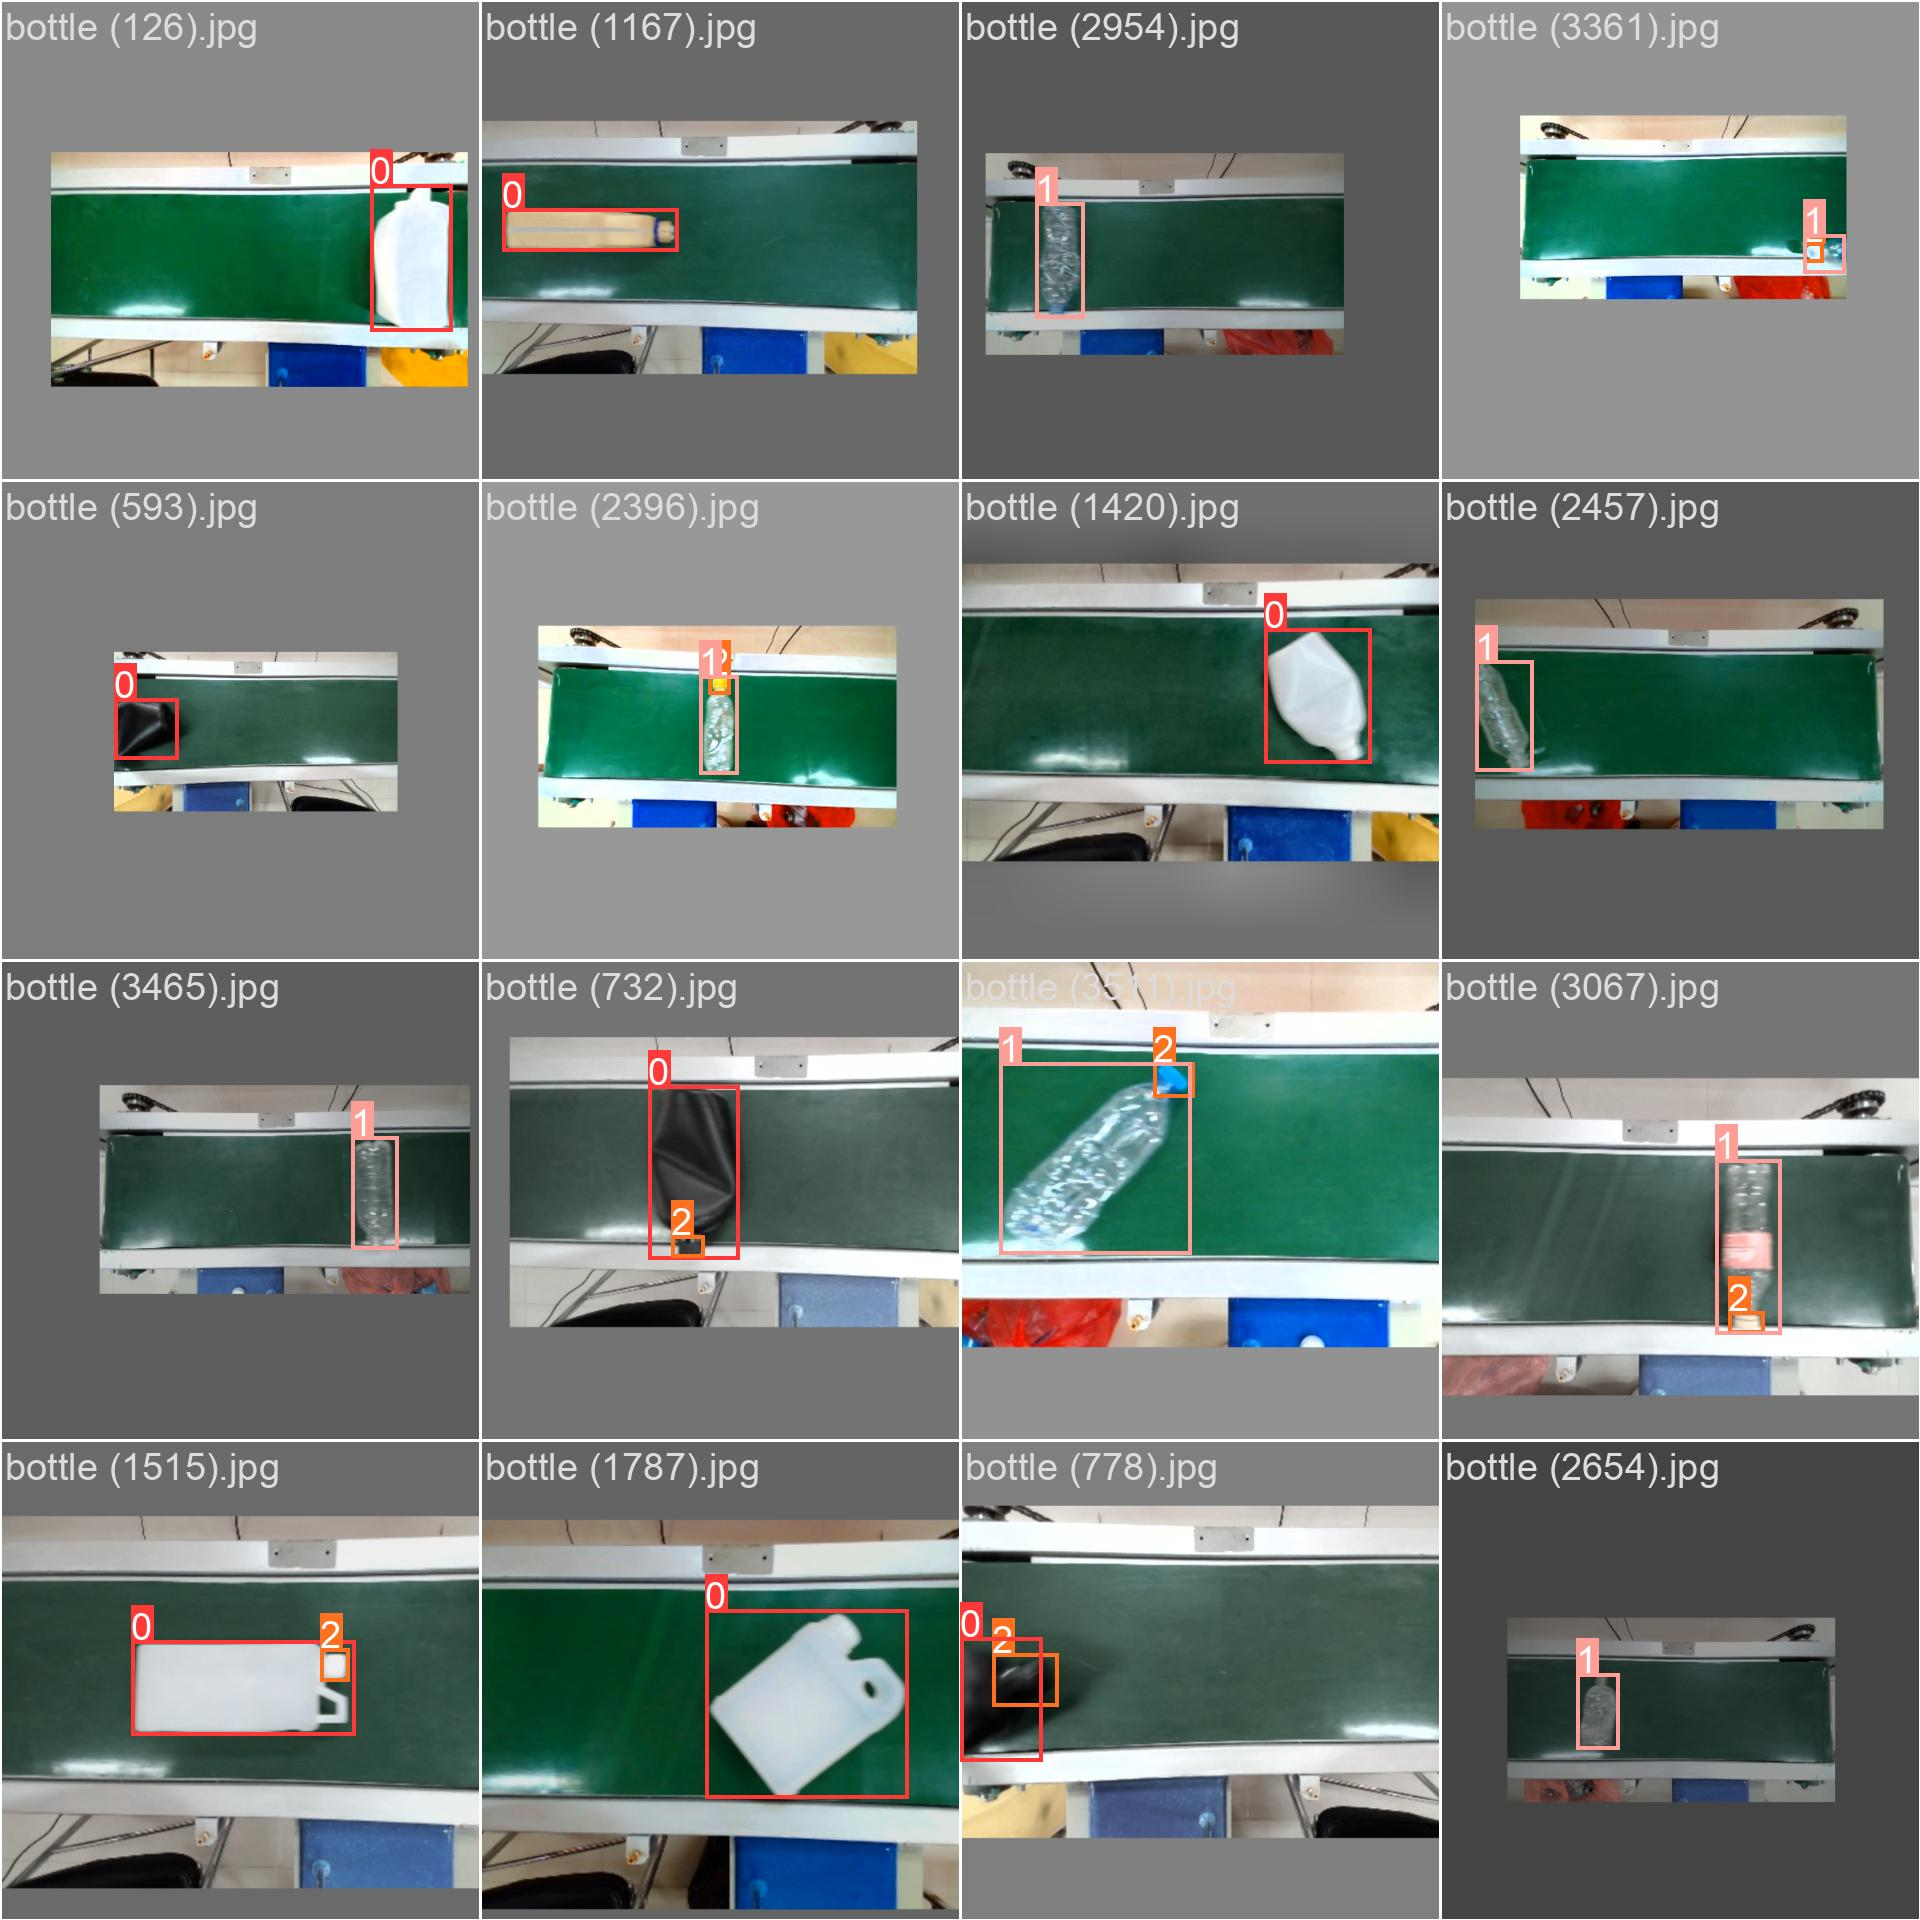

In [ ]:
Image("/content/yolov9/runs/detect/train2/train_batch2.jpg")

# Prediction

In [ ]:
x='/content/destination_folder/test/images/bottle (2331).jpg'
print(x)
results=model.predict(x)

/content/destination_folder/test/images/bottle (2331).jpg

image 1/1 /content/destination_folder/test/images/bottle (2331).jpg: 384x640 1 PET, 1 caps, 37.1ms
Speed: 3.5ms preprocess, 37.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

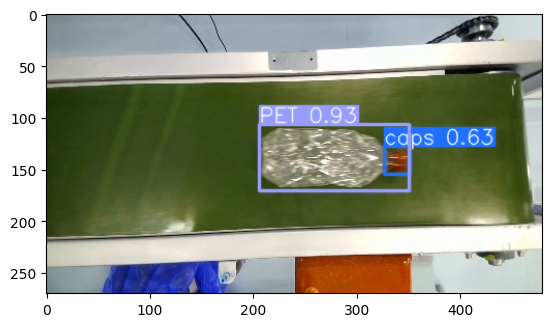

In [ ]:
import matplotlib.pyplot as plt
img = results[0].plot()
plt.imshow(img)
plt.show

In [ ]:
x1 ='/content/destination_folder/test/images/bottle (107).jpg'
print(x1)
results=model.predict(x1)

/content/destination_folder/test/images/bottle (107).jpg

image 1/1 /content/destination_folder/test/images/bottle (107).jpg: 384x640 1 HDPE, 44.5ms
Speed: 2.8ms preprocess, 44.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

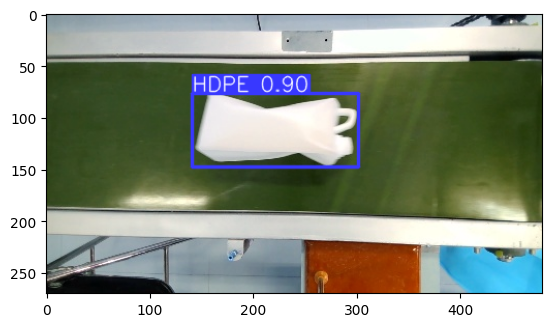

In [ ]:
img = results[0].plot()
plt.imshow(img)
plt.show